# Predicting The Stock Race

**Dillon Farber, Christian Davis, Quinn Templeton**

## Project Summary
The objective of this notebook is to take the stock information about a single stock and its information to find out whether the stock should be sold or bought. We take the information and use binary classification techniques to determine what the stock might be classified as to better determine the decision of someone to buy or sell that stock in its current state. We are using collected stock information from the years 2014-2018 years to train and test our models. The data has 20 thousand rows and 225 columns, giving us around 4 billion float and integer datapoints of data for us to use in creating models and feature selection.

## Project Statement

1. `Dealing with wether or not to buy or sell stocks, this model takes the guess work out of the decision. Predicting the stock market based on current and passed datapoints, classifing the stock as a buy or sell.`
2. `The data we are using is comprised of different stock information, from the revenue to its debt. We will figure out the relevant data to determing our stocks worth and if we can accurately predict buy or sell of futer data.`
3. `This data came from kaggle. It is mainly comprised of numbers in currency and floats based on percentages. Two types are of string nature, the 3 letter identifier and what sector its from. `
4. `We hope to achive a model that can predict stock dips and increases so that we can determine if we should buy, sell, or hold onto our current stocks. The parameter or column that helps us predict this model with the column name class. This column shows 0 or 1, 0 tells us to sell and 1 to buy. `

## Dataset

In [29]:
import time
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.svm import SVC
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.options.display.width = 50


In [30]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df14 = pd.read_csv('data/2014_Financial_Data.csv', delimiter=',')
df15 = pd.read_csv('data/2015_Financial_Data.csv', delimiter=',')
df16 = pd.read_csv('data/2016_Financial_Data.csv', delimiter=',')
df17 = pd.read_csv('data/2017_Financial_Data.csv', delimiter=',')
df18 = pd.read_csv('data/2018_Financial_Data.csv', delimiter=',')
pd.set_option('display.max_columns', None)


In [31]:
df14.shape, df15.shape, df16.shape, df17.shape, df18.shape


((3808, 225), (4120, 225), (4797, 225), (4960, 225), (4392, 225))

In [32]:
df14.head()


stock         Revenue  Revenue Growth  \
0    PG 74401000000.000          -0.071   
1  VIPS  3734148046.497           1.174   
2    KR 98375000000.000           0.018   
3   RAD 25526413000.000           0.005   
4   GIS 17909600000.000           0.008   

   Cost of Revenue    Gross Profit  \
0  39030000000.000 35371000000.000   
1   2805625443.978   928522602.519   
2  78138000000.000 20237000000.000   
3  18202679000.000  7323734000.000   
4  11539800000.000  6369800000.000   

   R&D Expenses    SG&A Expense  \
0         0.000 21461000000.000   
1 108330319.664   344141427.188   
2         0.000 15196000000.000   
3         0.000  6561162000.000   
4         0.000  3474300000.000   

   Operating Expenses  Operating Income  \
0     21461000000.000   13910000000.000   
1       793926703.261     134595899.257   
2     17512000000.000    2725000000.000   
3      6586482000.000     737252000.000   
4      3412400000.000    2957400000.000   

   Interest Expense  Earnings before Tax  \
0     709000000.000      14494000000.000   
1      12148692.283        175382305.457   
2     443000000.000       2270000000.000   
3     424591000.000        250218000.000   
4     302400000.000       2707700000.000   

   Income Tax Expense  \
0      2851000000.000   
1        39559573.781   
2       751000000.000   
3          804000.000   
4       883300000.000   

   Net Income - Non-Controlling int  \
0                     142000000.000   
1                     -14319179.852   
2                      12000000.000   
3                             0.000   
4                      36900000.000   

   Net Income - Discontinued ops  \
0                -1127000000.000   
1                          0.000   
2                          0.000   
3                          0.000   
4                          0.000   

       Net Income  Preferred Dividends  \
0 11643000000.000                0.000   
1   135822731.676                0.000   
2  1519000000.000                0.000   
3   249414000.000         33998000.000   
4  1824400000.000                0.000   

   Net Income Com   EPS  EPS Diluted  \
0 11643000000.000 4.190        4.010   
1   135822731.676 0.240        0.226   
2  1519000000.000 1.470        1.450   
3   215416000.000 4.600        4.600   
4  1824400000.000 2.900        2.830   

   Weighted Average Shs Out  \
0            2705960276.000   
1                       NaN   
2            1033052512.000   
3              48326279.000   
4             614492206.000   

   Weighted Average Shs Out (Dil)  \
0                  2705960276.000   
1                    18293619.955   
2                  1028000000.000   
3                    48326279.000   
4                   614492206.000   

   Dividend per Share  Gross Margin  \
0               2.448         0.475   
1               0.000         0.249   
2               0.307         0.206   
3               0.000         0.287   
4               1.550         0.356   

   EBITDA Margin  EBIT Margin  Profit Margin  \
0          0.247        0.204          0.156   
1          0.011        0.050          0.006   
2          0.045        0.028          0.015   
3          0.042        0.026          0.008   
4          0.201        0.168          0.102   

   Free Cash Flow margin          EBITDA  \
0                  0.136 18344000000.000   
1                  0.070   245685824.992   
2                  0.013  4416000000.000   
3                  0.014  1078550000.000   
4                  0.105  3595500000.000   

             EBIT  Consolidated Income  \
0 15203000000.000      11785000000.000   
1   187530997.740        121503551.824   
2  2713000000.000       1531000000.000   
3   674809000.000        249414000.000   
4  3010100000.000       1861300000.000   

   Earnings Before Tax Margin  \
0                       0.195   
1                       0.047   
2                       0.023   
3                       0.010   
4                       0.151   

   Net Profit Margin  Cash and 

In [33]:
df14.isna()


stock  Revenue  Revenue Growth  \
0     False    False           False   
1     False    False           False   
2     False    False           False   
3     False    False           False   
4     False    False           False   
...     ...      ...             ...   
3803  False    False           False   
3804  False    False           False   
3805  False    False            True   
3806  False    False           False   
3807  False    False           False   

      Cost of Revenue  Gross Profit  \
0               False         False   
1               False         False   
2               False         False   
3               False         False   
4               False         False   
...               ...           ...   
3803            False         False   
3804            False         False   
3805            False         False   
3806            False         False   
3807            False         False   

      R&D Expenses  SG&A Expense  \
0            False         False   
1            False         False   
2            False         False   
3            False         False   
4            False         False   
...            ...           ...   
3803         False         False   
3804         False         False   
3805          True         False   
3806         False         False   
3807         False         False   

      Operating Expenses  Operating Income  \
0                  False             False   
1                  False             False   
2                  False             False   
3                  False             False   
4                  False             False   
...                  ...               ...   
3803               False             False   
3804               False             False   
3805               False             False   
3806               False             False   
3807               False             False   

      Interest Expense  Earnings before Tax  \
0                False                False   
1                False                False   
2                False                False   
3                False                False   
4                False                False   
...                ...                  ...   
3803             False                False   
3804             False                False   
3805             False                False   
3806             False                False   
3807             False                False   

      Income Tax Expense  \
0                  False   
1                  False   
2                  False   
3                  False   
4                  False   
...                  ...   
3803               False   
3804               False   
3805               False   
3806               False   
3807               False   

      Net Income - Non-Controlling int  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   
...                                ...   
3803                             False   
3804                             False   
3805                              True   
3806                             False   
3807                             False   

      Net Income - Discontinued ops  Net Income  \
0                             False       False   
1                             False       False   
2                             False       False   
3                             False       False   
4                             False       False   
...                             ...         ...   
3803                          False       False   
3804                          False       False   
3805                           True       False   
3806                          False       False   
3807                          False       False   

      Preferred Dividends  Net Income Com  \
0    

In [34]:
df15.isna()

stock  Revenue  Revenue Growth  \
0     False    False           False   
1     False    False           False   
2     False    False           False   
3     False    False           False   
4     False    False           False   
...     ...      ...             ...   
4115  False    False           False   
4116  False    False           False   
4117  False    False            True   
4118  False    False           False   
4119  False    False           False   

      Cost of Revenue  Gross Profit  \
0               False         False   
1               False         False   
2               False         False   
3               False         False   
4               False         False   
...               ...           ...   
4115            False         False   
4116            False         False   
4117            False         False   
4118            False         False   
4119            False         False   

      R&D Expenses  SG&A Expense  \
0            False         False   
1            False         False   
2            False         False   
3            False         False   
4            False         False   
...            ...           ...   
4115         False         False   
4116         False         False   
4117          True         False   
4118         False         False   
4119         False         False   

      Operating Expenses  Operating Income  \
0                  False             False   
1                  False             False   
2                  False             False   
3                  False             False   
4                  False             False   
...                  ...               ...   
4115               False             False   
4116               False             False   
4117               False             False   
4118               False             False   
4119               False             False   

      Interest Expense  Earnings before Tax  \
0                False                False   
1                False                False   
2                False                False   
3                False                False   
4                False                False   
...                ...                  ...   
4115             False                False   
4116             False                False   
4117             False                False   
4118             False                False   
4119             False                False   

      Income Tax Expense  \
0                  False   
1                  False   
2                  False   
3                  False   
4                  False   
...                  ...   
4115               False   
4116               False   
4117               False   
4118               False   
4119               False   

      Net Income - Non-Controlling int  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   
...                                ...   
4115                             False   
4116                             False   
4117                              True   
4118                             False   
4119                             False   

      Net Income - Discontinued ops  Net Income  \
0                             False       False   
1                             False       False   
2                             False       False   
3                             False       False   
4                             False       False   
...                             ...         ...   
4115                          False       False   
4116                          False       False   
4117                           True       False   
4118                          False       False   
4119                          False       False   

      Preferred Dividends  Net Income Com  \
0    

In [35]:
df16.isna()

stock  Revenue  Revenue Growth  \
0     False    False           False   
1     False    False           False   
2     False    False           False   
3     False    False           False   
4     False    False           False   
...     ...      ...             ...   
4792  False    False           False   
4793  False    False           False   
4794  False    False            True   
4795  False    False           False   
4796  False    False           False   

      Cost of Revenue  Gross Profit  \
0               False         False   
1               False         False   
2               False         False   
3               False         False   
4               False         False   
...               ...           ...   
4792            False         False   
4793            False         False   
4794            False         False   
4795            False         False   
4796            False         False   

      R&D Expenses  SG&A Expense  \
0            False         False   
1            False         False   
2            False         False   
3            False         False   
4            False         False   
...            ...           ...   
4792         False         False   
4793         False         False   
4794          True         False   
4795         False         False   
4796         False         False   

      Operating Expenses  Operating Income  \
0                  False             False   
1                  False             False   
2                  False             False   
3                  False             False   
4                  False             False   
...                  ...               ...   
4792               False             False   
4793               False             False   
4794               False             False   
4795               False             False   
4796               False             False   

      Interest Expense  Earnings before Tax  \
0                False                False   
1                False                False   
2                False                False   
3                False                False   
4                False                False   
...                ...                  ...   
4792             False                False   
4793             False                False   
4794             False                False   
4795             False                False   
4796             False                False   

      Income Tax Expense  \
0                  False   
1                  False   
2                  False   
3                  False   
4                  False   
...                  ...   
4792               False   
4793               False   
4794               False   
4795               False   
4796               False   

      Net Income - Non-Controlling int  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   
...                                ...   
4792                             False   
4793                             False   
4794                              True   
4795                             False   
4796                             False   

      Net Income - Discontinued ops  Net Income  \
0                             False       False   
1                             False       False   
2                             False       False   
3                             False       False   
4                             False       False   
...                             ...         ...   
4792                          False       False   
4793                          False       False   
4794                           True       False   
4795                          False       False   
4796                          False       False   

      Preferred Dividends  Net Income Com  \
0    

In [36]:
df17.isna()

stock  Revenue  Revenue Growth  \
0     False    False           False   
1     False    False           False   
2     False    False           False   
3     False    False           False   
4     False    False           False   
...     ...      ...             ...   
4955  False    False           False   
4956  False    False           False   
4957  False    False            True   
4958  False    False           False   
4959  False    False           False   

      Cost of Revenue  Gross Profit  \
0               False         False   
1               False         False   
2               False         False   
3               False         False   
4               False         False   
...               ...           ...   
4955            False         False   
4956            False         False   
4957            False         False   
4958            False         False   
4959            False         False   

      R&D Expenses  SG&A Expense  \
0            False         False   
1            False         False   
2            False         False   
3            False         False   
4            False         False   
...            ...           ...   
4955         False         False   
4956         False         False   
4957          True         False   
4958         False         False   
4959         False         False   

      Operating Expenses  Operating Income  \
0                  False             False   
1                  False             False   
2                  False             False   
3                  False             False   
4                  False             False   
...                  ...               ...   
4955               False             False   
4956               False             False   
4957               False             False   
4958               False             False   
4959               False             False   

      Interest Expense  Earnings before Tax  \
0                False                False   
1                False                False   
2                False                False   
3                False                False   
4                False                False   
...                ...                  ...   
4955             False                False   
4956             False                False   
4957             False                False   
4958             False                False   
4959             False                False   

      Income Tax Expense  \
0                  False   
1                  False   
2                  False   
3                  False   
4                  False   
...                  ...   
4955               False   
4956               False   
4957               False   
4958               False   
4959               False   

      Net Income - Non-Controlling int  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   
...                                ...   
4955                             False   
4956                             False   
4957                              True   
4958                             False   
4959                             False   

      Net Income - Discontinued ops  Net Income  \
0                             False       False   
1                             False       False   
2                             False       False   
3                             False       False   
4                             False       False   
...                             ...         ...   
4955                          False       False   
4956                          False       False   
4957                           True       False   
4958                          False       False   
4959                          False       False   

      Preferred Dividends  Net Income Com  \
0    

In [37]:
df18.isna()

stock  Revenue  Revenue Growth  \
0     False    False           False   
1     False    False           False   
2     False    False           False   
3     False    False           False   
4     False    False           False   
...     ...      ...             ...   
4387  False    False           False   
4388  False    False           False   
4389  False    False           False   
4390  False    False           False   
4391  False    False           False   

      Cost of Revenue  Gross Profit  \
0               False         False   
1               False         False   
2               False         False   
3               False         False   
4               False         False   
...               ...           ...   
4387            False         False   
4388            False         False   
4389            False         False   
4390            False         False   
4391            False         False   

      R&D Expenses  SG&A Expense  \
0            False         False   
1            False         False   
2            False         False   
3            False         False   
4            False         False   
...            ...           ...   
4387         False         False   
4388         False         False   
4389         False         False   
4390         False         False   
4391         False         False   

      Operating Expenses  Operating Income  \
0                  False             False   
1                  False             False   
2                  False             False   
3                  False             False   
4                  False             False   
...                  ...               ...   
4387               False             False   
4388               False             False   
4389               False             False   
4390               False             False   
4391               False             False   

      Interest Expense  Earnings before Tax  \
0                False                False   
1                False                False   
2                False                False   
3                False                False   
4                False                False   
...                ...                  ...   
4387             False                False   
4388             False                False   
4389             False                False   
4390             False                False   
4391             False                False   

      Income Tax Expense  \
0                  False   
1                  False   
2                  False   
3                  False   
4                  False   
...                  ...   
4387               False   
4388               False   
4389               False   
4390               False   
4391               False   

      Net Income - Non-Controlling int  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   
...                                ...   
4387                             False   
4388                             False   
4389                             False   
4390                             False   
4391                             False   

      Net Income - Discontinued ops  Net Income  \
0                             False       False   
1                             False       False   
2                             False       False   
3                             False       False   
4                             False       False   
...                             ...         ...   
4387                          False       False   
4388                          False       False   
4389                          False       False   
4390                          False       False   
4391                          False       False   

      Preferred Dividends  Net Income Com  \
0    

<AxesSubplot:>

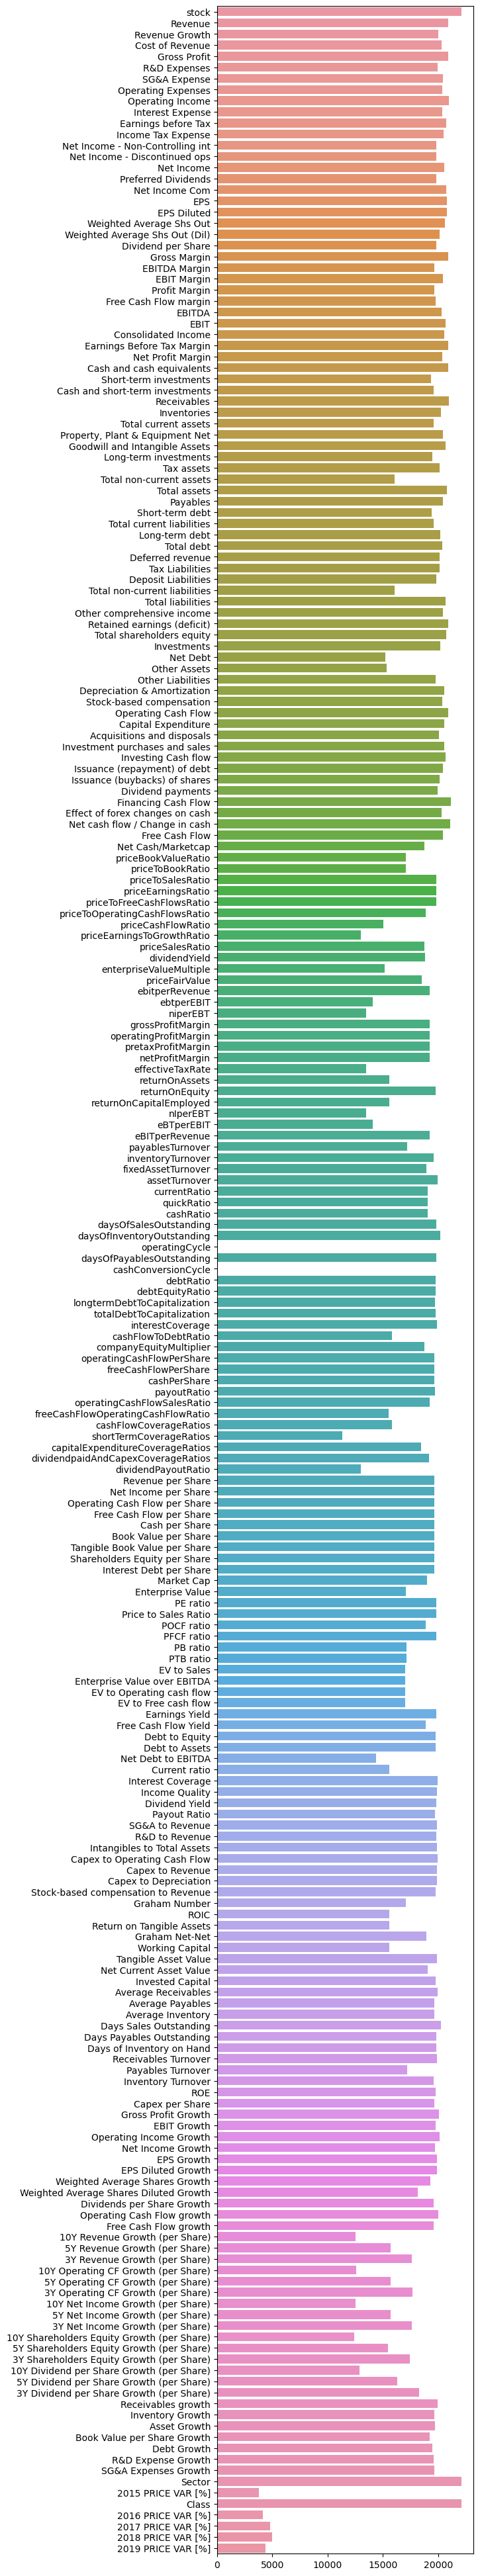

In [38]:
df = pd.concat([df14, df15, df16, df17, df18])
columns = df.columns.unique()
df.columns = columns

# plt.figure(figsize=(5, 50))
# sns.barplot(
#     x=df.count(),
#     y=df.columns
# )


***Dataset Summary***

`We used a kaggle data, from a stock market data pull. We checked the number of columns and rows to determine if the data was large enough for our needs. Has a classifier column for predicting buy or sell.`

# Exploratory Data Analysis

`Some stocks are missing data completely while others are only missing random points. For completeness we will fill the missing values with the mean of the columns`

In [39]:
df14.fillna(df14.mean(), inplace=True), df15.fillna(df15.mean(), inplace=True), df16.fillna(
    df16.mean(), inplace=True), df17.fillna(df17.mean(), inplace=True), df18.fillna(df18.mean(), inplace=True)
df14.isna().sum(), df15.isna().sum(), df16.isna(
).sum(), df17.isna(), df18.isna().sum()


(stock                   0
 Revenue                 0
 Revenue Growth          0
 Cost of Revenue         0
 Gross Profit            0
                        ..
 R&D Expense Growth      0
 SG&A Expenses Growth    0
 Sector                  0
 2015 PRICE VAR [%]      0
 Class                   0
 Length: 225, dtype: int64,
 stock                   0
 Revenue                 0
 Revenue Growth          0
 Cost of Revenue         0
 Gross Profit            0
                        ..
 R&D Expense Growth      0
 SG&A Expenses Growth    0
 Sector                  0
 2016 PRICE VAR [%]      0
 Class                   0
 Length: 225, dtype: int64,
 stock                   0
 Revenue                 0
 Revenue Growth          0
 Cost of Revenue         0
 Gross Profit            0
                        ..
 R&D Expense Growth      0
 SG&A Expenses Growth    0
 Sector                  0
 2017 PRICE VAR [%]      0
 Class                   0
 Length: 225, dtype: int64,
       stock  Revenue  Re

`Displaying data from the sector column and determining the use and validity of the data. Also changed the data type form string/object. We changed to a numeric data of int datatype for use in correlation between columns and feature selection techniques.`

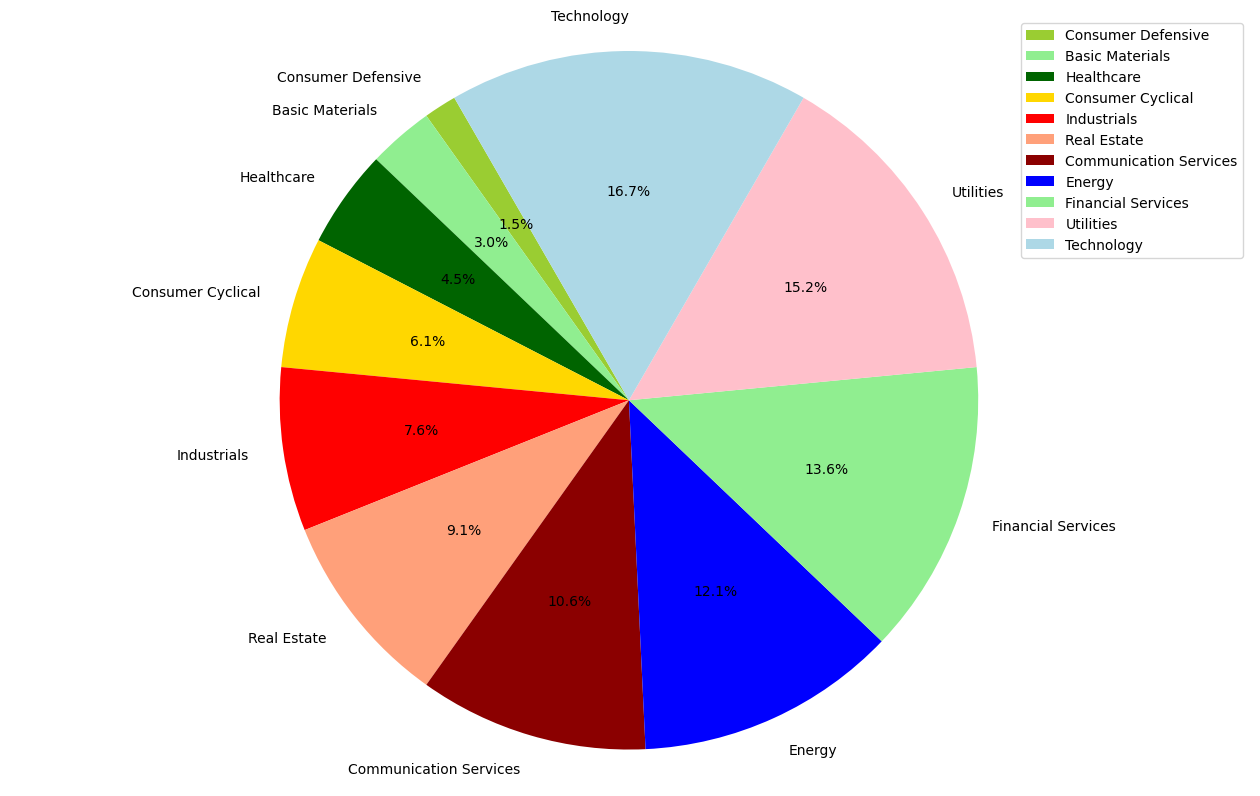

In [40]:
import matplotlib.pyplot as plt
df14['Sector'].unique()
sec_labels = df14['Sector'].unique()

sector = {'Consumer Defensive': 1, 'Basic Materials': 2, 'Healthcare': 3,
          'Consumer Cyclical': 4, 'Industrials': 5, 'Real Estate': 6,
          'Communication Services': 7, 'Energy': 8, 'Financial Services': 9,
          'Utilities': 10, 'Technology': 11}

df14.Sector = [sector[sect] for sect in df14.Sector]
df15.Sector = [sector[sect] for sect in df15.Sector]
df16.Sector = [sector[sect] for sect in df16.Sector]
df17.Sector = [sector[sect] for sect in df17.Sector]
df18.Sector = [sector[sect] for sect in df18.Sector]
df14['Sector'].unique()


labels = list(sec_labels)
sizes = df14['Sector'].unique()
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red',
          'lightsalmon', 'darkred', 'Blue', 'lightgreen', 'pink', 'lightblue']

fig1, ax1 = plt.subplots(figsize=(16, 10))
ax1.pie(sizes, explode=None, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=120)
ax1.axis('equal')
plt.legend()
plt.show()


`Due to the size of our data we will narrow down the columns using various feature selections`

`Our target for this project is the class column and is determined by the price variance column, so price variance needs to be dropped`

In [41]:
df14.drop(columns=["2015 PRICE VAR [%]"], inplace=True)
df15.drop(columns=["2016 PRICE VAR [%]"], inplace=True)
df16.drop(columns=["2017 PRICE VAR [%]"], inplace=True)
df17.drop(columns=["2018 PRICE VAR [%]"], inplace=True)
df18.drop(columns=["2019 PRICE VAR [%]"], inplace=True)

In [42]:
# combine all the data sets into one
list_of_dfs = [df14, df15, df16, df17, df18]

df = pd.concat(list_of_dfs)

# the name of the stock is of no consequence
df.drop(columns=['stock'], inplace=True)

In [43]:
df.describe()

Revenue  Revenue Growth  \
count         22077.000       22077.000   
mean     5152726780.033           3.520   
std     31113662617.580         297.498   
min      -627616000.000         -12.769   
25%        66609000.000          -0.003   
50%       524373506.119           0.074   
75%      3123143000.000           0.278   
max   1886894000000.000       42138.664   

        Cost of Revenue     Gross Profit  \
count         22077.000        22077.000   
mean     3252083019.405   1966796087.130   
std     24773186483.281   8493618940.888   
min     -2986887894.737 -12808000000.000   
25%         6850000.000     34494000.000   
50%       223500847.327    230303000.000   
75%      2042748091.603   1186842000.000   
max   1581527000000.000 462160000000.000   

         R&D Expenses     SG&A Expense  \
count       22077.000        22077.000   
mean    103363476.208    868497454.707   
std     729492251.715   3657660875.364   
min    -109800000.000   -140159420.290   
25%             0.000     19918000.000   
50%             0.000    102100000.000   
75%      33283000.000    580400000.000   
max   28837000000.000 185683000000.000   

       Operating Expenses  Operating Income  \
count           22077.000         22077.000   
mean       1365938033.427     588577043.920   
std        5440330550.331    2901304201.207   
min       -5495511687.993  -19339000000.000   
25%          40552634.474      -3000000.000   
50%         189089000.000      45257000.000   
75%         960400000.000     344544000.000   
max      305605000000.000  156554000000.000   

       Interest Expense  Earnings before Tax  \
count         22077.000            22077.000   
mean       97753649.277        491253842.539   
std       479807284.633       2406405760.943   
min     -1710953646.295     -21772000000.000   
25%               0.000         -6578000.000   
50%         6346000.000         32728000.000   
75%        85500000.000        300533000.000   
max     31523000000.000      87205000000.000   

       Income Tax Expense  \
count           22077.000   
mean        133083801.510   
std        7670455109.752   
min     -738000000000.000   
25%                 0.000   
50%           4979230.769   
75%          73055773.763   
max      849000000000.000   

       Net Income - Non-Controlling int  \
count                         22077.000   
mean                       13321132.658   
std                       136200859.698   
min                     -1587227414.330   
25%                               0.000   
50%                               0.000   
75%                         1612712.000   
max                      6430813534.917   

       Net Income - Discontinued ops  \
count                      22077.000   
mean                    -3128927.067   
std                    229757427.874   
min                 -15914500000.000   
25%                            0.000   
50%                            0.000   
75%                            0.000   
max                   8368000000.000   

            Net Income  Preferred Dividends  \
count        22077.000            22077.000   
mean     386212695.723          4670293.694   
std     2548372493.393         50488106.682   
min   -23045000000.000       -161000000.000   
25%       -6498000.000                0.000   
50%       27143000.000                0.000   
75%      262179000.000                0.000   
max   233997000000.000       2741588000.000   

        Net Income Com            EPS  \
count        22077.000      22077.000   
mean     384962945.345     -10380.400   
std     2549625994.803     869294.556   
min   -23045000000.000 -101870898.131   
25%       -7296000.000         -0.730   
50%       25318000.000          0.500   
75%      244418000.000          1.900   
max   233997000000.000    8028004.014   

         EPS Diluted  Weighted Average Shs Out  \
count      22077.000                 22077.000   
mean      -10467.275             262952376.026   
std       868756.230            19757094

`from above we can conclude that normilzation of the data will be needed for some models`

In [44]:
y = df['Class'].values
x = df.drop(columns='Class')


In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x.values, y, test_size=.2, random_state=42)


#### <center>`SVC Feature Selection`</center>

In [46]:
svc = make_pipeline(StandardScaler(),SelectKBest(k=10), SVC())
svc.fit(xtrain,ytrain)
pred = svc.predict(xtest)

accuracy_score = accuracy_score(pred,ytest)
print('accuracy score : ',accuracy_score)


accuracy score :  0.6673460144927537


In [47]:
features = svc.named_steps['selectkbest']
x_transformed = features.transform(x)
kb_x = x[[val for i,val in enumerate(x.columns) if features.get_support()[i]]]
kb_x.columns

Index(['operatingCycle', 'cashConversionCycle',
       '10Y Revenue Growth (per Share)',
       '5Y Revenue Growth (per Share)',
       '10Y Operating CF Growth (per Share)',
       '5Y Operating CF Growth (per Share)',
       '10Y Net Income Growth (per Share)',
       '10Y Shareholders Equity Growth (per Share)',
       '5Y Dividend per Share Growth (per Share)',
       'Sector'],
      dtype='object')

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x.values, y, test_size=.2, random_state=42)


In [49]:
svc = make_pipeline(MinMaxScaler(),SelectPercentile(chi2, percentile=10), SVC())
svc.fit(xtrain,ytrain)
pred = svc.predict(xtest)

# accuracy_score = accuracy_score(pred,ytest)
print('accuracy score : ', svc.score(xtest, ytest))

features = svc.named_steps['selectpercentile']
x_transformed = features.transform(x)
sp_x = x[[val for i, val in enumerate(x.columns) if features.get_support()[i]]]
sp_x.columns


### <center>`Random Forest Feature Selection`</center>

<AxesSubplot:>

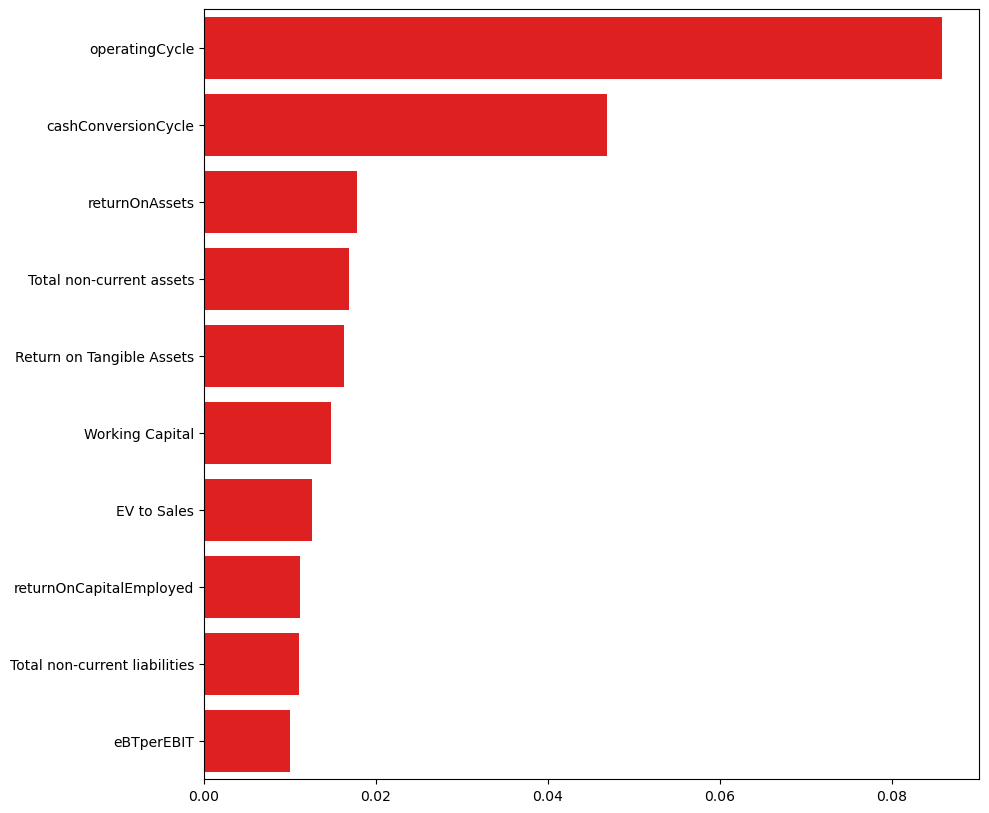

In [ ]:
rf = RandomForestClassifier(
    max_depth=10, random_state=42, n_estimators=300).fit(xtrain, ytrain)
rf_sel = pd.Series(rf.feature_importances_, index=x.columns)
rf_sel.sort_values(ascending=False, inplace=True)

top10 = rf_sel.head(10)
plt.figure(figsize=(10, 10))
sns.barplot(x=top10, y=top10.index, color='red')


In [ ]:
rf_df = x.filter(top10.index)

xtrain, xtest, ytrain, ytest = train_test_split(
    rf_df, y, test_size=.2, random_state=42)

rf = RandomForestClassifier(max_depth=10, random_state=42,
                                  n_estimators=300).fit(xtrain, ytrain)
pred = rf.predict(xtest)

# print('accuracy_score: ', accuracy_score(pred, ytest) )
print('score : ', rf.score(xtest, ytest))


score :  0.6854619565217391


### <center>`Correlated Features`</center>

In [ ]:
# make a copy 
cor_df = df.copy()

corr_matrix = cor_df.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
cols_to_drop = [column for column in upper.columns if any(upper[column] >= .8)]
cor_df.drop(columns=cols_to_drop, inplace=True)
print('Number of original columns ', len(df.columns))
print('number of columns after removing tightly correlated cols: ', len(cor_df.columns))


Number of original columns  223
number of columns after removing tightly correlated cols:  134


- `Now were going to find the top 15 out of the remaining 134 correlated columns to use as our features`

In [ ]:
largest15 = df.corr().abs().nlargest(15, 'Class').index.tolist()
cor_df = df.filter(largest15)
cor_df.columns


Index(['Class', 'operatingCycle',
       'cashConversionCycle', 'Sector',
       '10Y Shareholders Equity Growth (per Share)',
       '10Y Revenue Growth (per Share)',
       '5Y Revenue Growth (per Share)',
       '10Y Operating CF Growth (per Share)',
       '10Y Net Income Growth (per Share)',
       '5Y Dividend per Share Growth (per Share)',
       'Enterprise Value',
       '5Y Operating CF Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)',
       'Dividend payments',
       '5Y Net Income Growth (per Share)'],
      dtype='object')

<AxesSubplot:>

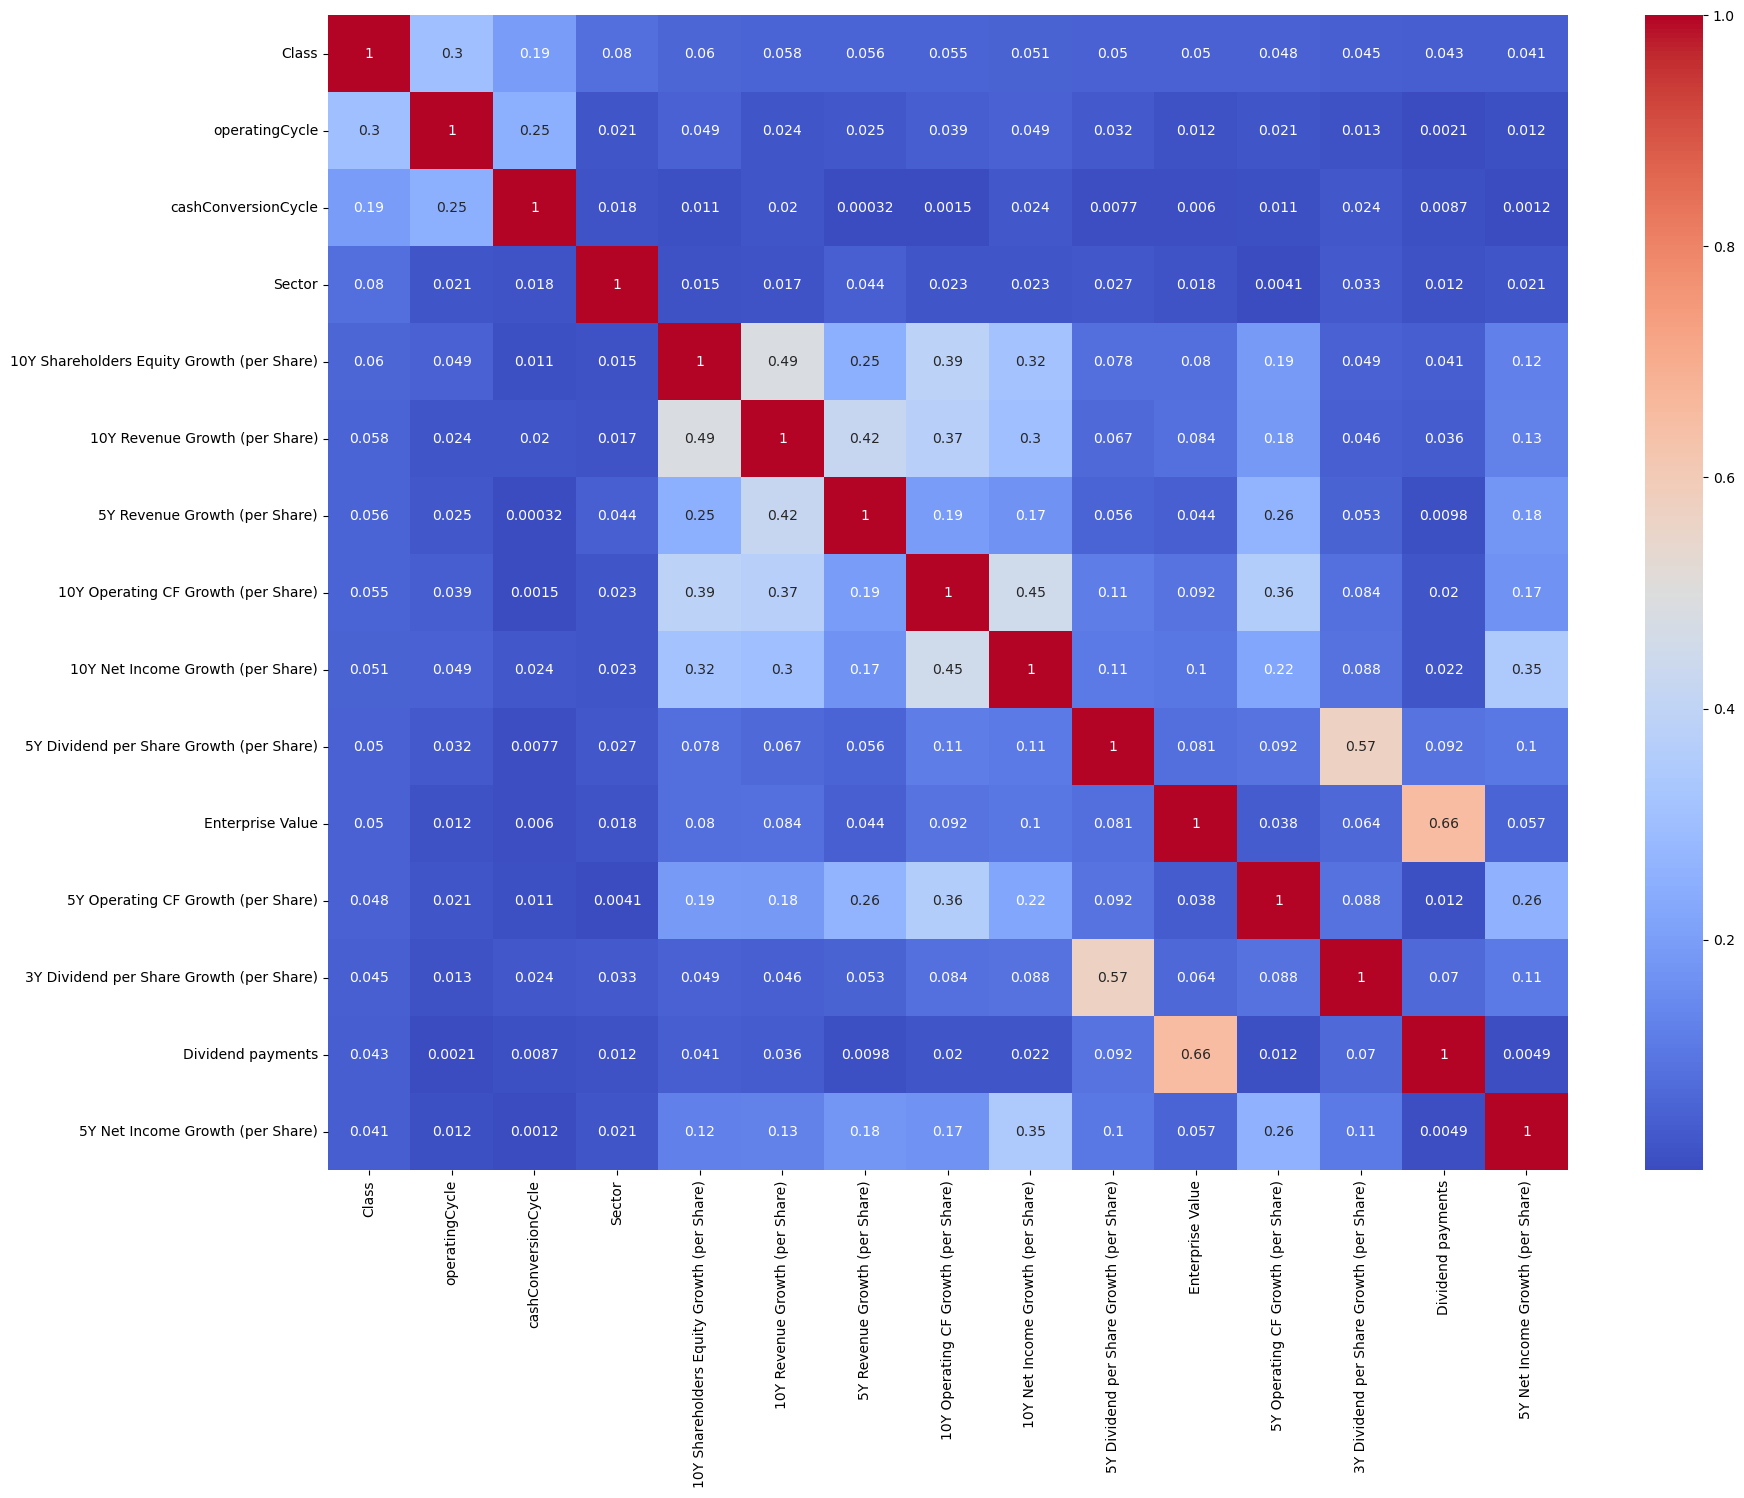

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(cor_df.corr().abs(), annot=True, cmap='coolwarm')


# <center> `Data Preprocessing` </center>

- Have you considered Dimensionality Reduction or Scaling?
  - If yes, include steps here.

In [ ]:
df.describe()

Revenue  Revenue Growth  \
count         22077.000       22077.000   
mean     5152726780.033           3.520   
std     31113662617.580         297.498   
min      -627616000.000         -12.769   
25%        66609000.000          -0.003   
50%       524373506.119           0.074   
75%      3123143000.000           0.278   
max   1886894000000.000       42138.664   

        Cost of Revenue     Gross Profit  \
count         22077.000        22077.000   
mean     3252083019.405   1966796087.130   
std     24773186483.281   8493618940.888   
min     -2986887894.737 -12808000000.000   
25%         6850000.000     34494000.000   
50%       223500847.327    230303000.000   
75%      2042748091.603   1186842000.000   
max   1581527000000.000 462160000000.000   

         R&D Expenses     SG&A Expense  \
count       22077.000        22077.000   
mean    103363476.208    868497454.707   
std     729492251.715   3657660875.364   
min    -109800000.000   -140159420.290   
25%             0.000     19918000.000   
50%             0.000    102100000.000   
75%      33283000.000    580400000.000   
max   28837000000.000 185683000000.000   

       Operating Expenses  Operating Income  \
count           22077.000         22077.000   
mean       1365938033.427     588577043.920   
std        5440330550.331    2901304201.207   
min       -5495511687.993  -19339000000.000   
25%          40552634.474      -3000000.000   
50%         189089000.000      45257000.000   
75%         960400000.000     344544000.000   
max      305605000000.000  156554000000.000   

       Interest Expense  Earnings before Tax  \
count         22077.000            22077.000   
mean       97753649.277        491253842.539   
std       479807284.633       2406405760.943   
min     -1710953646.295     -21772000000.000   
25%               0.000         -6578000.000   
50%         6346000.000         32728000.000   
75%        85500000.000        300533000.000   
max     31523000000.000      87205000000.000   

       Income Tax Expense  \
count           22077.000   
mean        133083801.510   
std        7670455109.752   
min     -738000000000.000   
25%                 0.000   
50%           4979230.769   
75%          73055773.763   
max      849000000000.000   

       Net Income - Non-Controlling int  \
count                         22077.000   
mean                       13321132.658   
std                       136200859.698   
min                     -1587227414.330   
25%                               0.000   
50%                               0.000   
75%                         1612712.000   
max                      6430813534.917   

       Net Income - Discontinued ops  \
count                      22077.000   
mean                    -3128927.067   
std                    229757427.874   
min                 -15914500000.000   
25%                            0.000   
50%                            0.000   
75%                            0.000   
max                   8368000000.000   

            Net Income  Preferred Dividends  \
count        22077.000            22077.000   
mean     386212695.723          4670293.694   
std     2548372493.393         50488106.682   
min   -23045000000.000       -161000000.000   
25%       -6498000.000                0.000   
50%       27143000.000                0.000   
75%      262179000.000                0.000   
max   233997000000.000       2741588000.000   

        Net Income Com            EPS  \
count        22077.000      22077.000   
mean     384962945.345     -10380.400   
std     2549625994.803     869294.556   
min   -23045000000.000 -101870898.131   
25%       -7296000.000         -0.730   
50%       25318000.000          0.500   
75%      244418000.000          1.900   
max   233997000000.000    8028004.014   

         EPS Diluted  Weighted Average Shs Out  \
count      22077.000                 22077.000   
mean      -10467.275             262952376.026   
std       868756.230            19757094

- `We are going to reduce the deminsionality of our data using PCA and TSNE but first we need to normalize our data. We use standaderd scaler to make the the data shrink in the amount of size the data. We had data that was in the 10's of billions and then negative numbes. Then we decieded to use the TSNE and PCA for reductions in dimensionality to help with dealing with the use in the model.`

In [ ]:
sc = StandardScaler()
x = df.drop(columns='Class')
cols = x.columns
tsne_df = pd.DataFrame(sc.fit_transform(x))
tsne_df.columns = cols
tsne_df['Class'] = y

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(tsne_df)
tsne_df['pca-one'] = pca_result[:, 0]
tsne_df['pca-two'] = pca_result[:, 1]
tsne_df['pca-three'] = pca_result[:, 2]


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
tsne_results = tsne.fit_transform(tsne_df)
tsne_df['tsne-2d-one'] = tsne_results[:, 0]
tsne_df['tsne-2d-two'] = tsne_results[:, 1]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 22077 samples in 0.001s...
[t-SNE] Computed neighbors for 22077 samples in 10.551s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22077
[t-SNE] Computed conditional probabilities for sample 2000 / 22077
[t-SNE] Computed conditional probabilities for sample 3000 / 22077
[t-SNE] Computed conditional probabilities for sample 4000 / 22077
[t-SNE] Computed conditional probabilities for sample 5000 / 22077
[t-SNE] Computed conditional probabilities for sample 6000 / 22077
[t-SNE] Computed conditional probabilities for sample 7000 / 22077
[t-SNE] Computed conditional probabilities for sample 8000 / 22077
[t-SNE] Computed conditional probabilities for sample 9000 / 22077
[t-SNE] Computed conditional probabilities for sample 10000 / 22077
[t-SNE] Computed conditional probabilities for sample 11000 / 22077
[t-SNE] Computed conditional probabilities for sample 12000 / 22077
[t-SNE] Computed conditional probabilities for s

KeyboardInterrupt: 

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

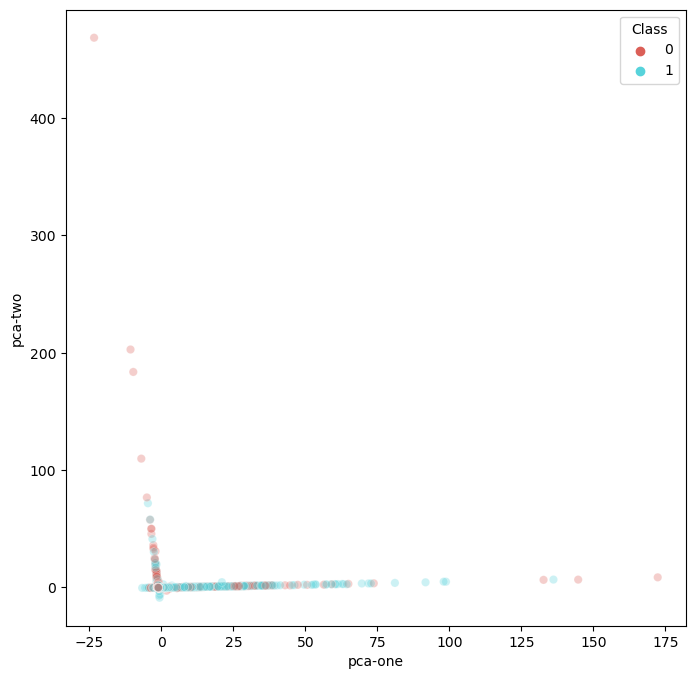

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3
)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

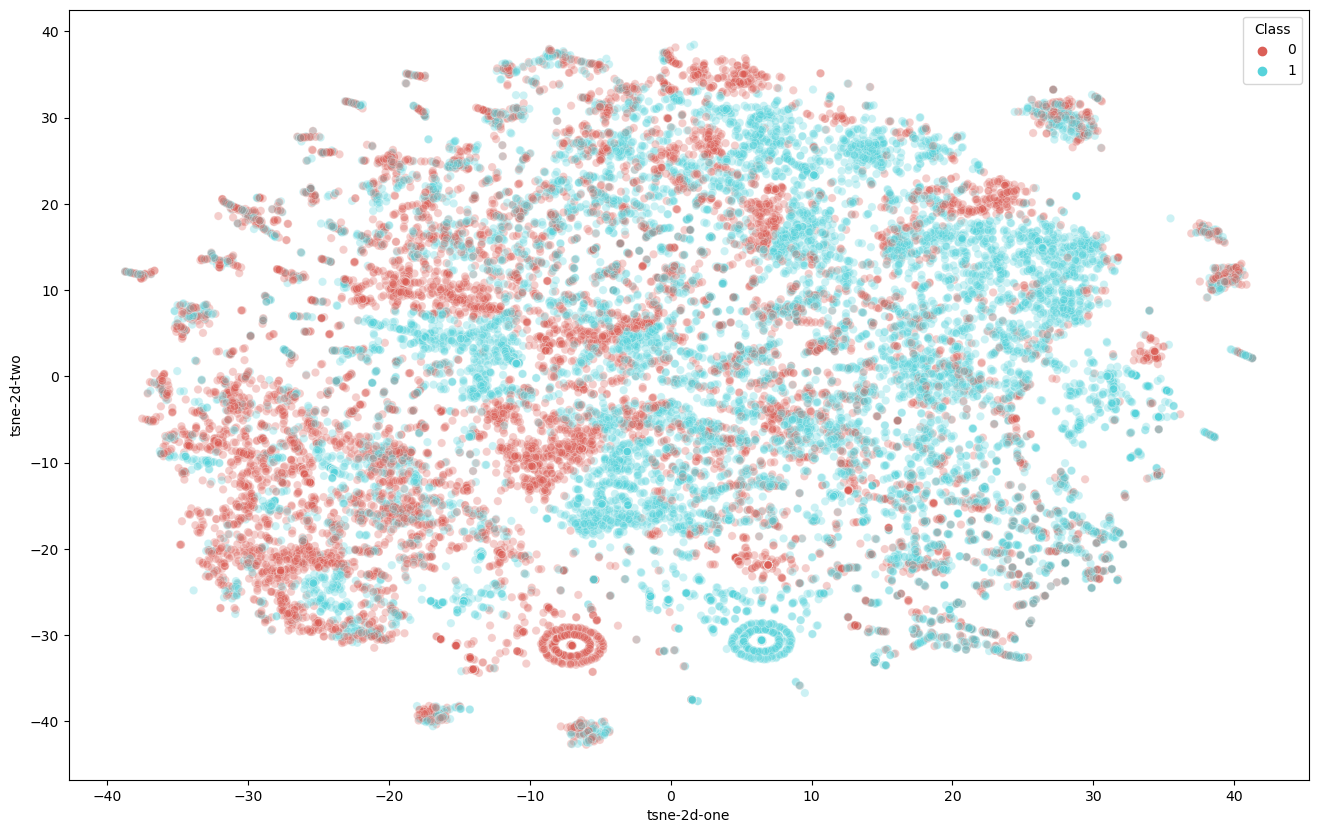

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3
)


# Machine Learning Approaches

- Describe the ML methods that you consider using and what is the reason for their choice?

  - What is the family of machine learning algorithms you are using and why?

    - Classification

      `TNSE, svm, bagging, gradient boosting, kmeans clustering`

      - KNeighbors technique used due to the amount of data, and also being a predictor for binary predictions. We felt that it would be a stable and affective method for determining the correct class. 
      - svm since the data is non linear and making it a good model with the TSNE used on the dataset.
      - bagging the data is we can use these technique to use a tree to help speed up and use the best features to have the best outcome of the data to have the best predictions.
      - Last we used a gradient boosting and XGBoosting for the dataset to use a on trees. 
      
      `We chose these types of models due to the decision methods for binary outcomes being some of the best options.`


# Experiments 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

predictions = {}


`We have four different models to experiment on first lets look at TSNE`

In [ ]:
def print_matrix(model, x_test, y_test):
    cm = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
    plt.title("Model - Confusion Matrix")
    plt.xticks(range(2), ["Class 0", "Class 1"], fontsize=10)
    plt.yticks(range(2), ["Class 0", "Class 1"], fontsize=10)
    plt.show()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tsne_results, y, test_size=.2, random_state=42)

#### <center> `TSNE-KNN`

BEST VALUE OF K 7
Test Score:  0.7721920289855072
KNN Model Accuracy Score:  0.7721920289855072


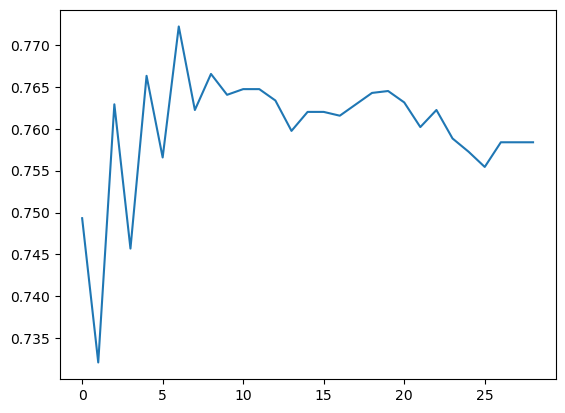

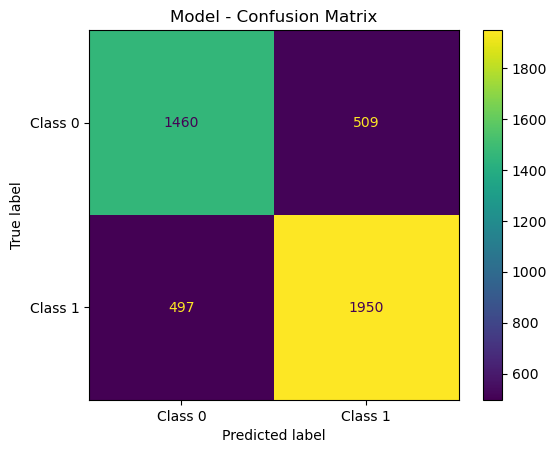

In [ ]:
from sklearn.metrics import accuracy_score

def return_score(k, x_test, x_train, y_test, y_train):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        return knn.score(x_test, y_test)

result = [*map(lambda i:return_score(i, x_test, x_train,
                y_test, y_train), range(1, 30))]
print('BEST VALUE OF K', np.argmax(result) + 1)
plt.plot(result)
bestknn = KNeighborsClassifier(n_neighbors=np.argmax(result) + 1)

bestknn.fit(x_train, y_train)


ypred = bestknn.predict(x_test)
print("Test Score: ",bestknn.score(x_test, y_test))
predictions['KNN-TSNE'] = accuracy_score(y_test, ypred)
print("KNN Model Accuracy Score: ",accuracy_score(y_test, ypred))

print_matrix(bestknn, x_test, y_test)


- `Trying to improve using Gradient Boosting `

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators=20, learning_rate=learning_rate, max_depth=10, max_features='auto', random_state=42)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    gb_pred = gb.predict(x_test)
    mse = mean_squared_error(y_test, gb_pred)
    print("Accuracy score (training): {0:.3f}".format(
        gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        gb.score(x_test, y_test)))
    print()


Learning rate:  0.05
Accuracy score (training): 0.837
Accuracy score (validation): 0.761

Learning rate:  0.1
Accuracy score (training): 0.852
Accuracy score (validation): 0.760

Learning rate:  0.25
Accuracy score (training): 0.883
Accuracy score (validation): 0.756

Learning rate:  0.5
Accuracy score (training): 0.900
Accuracy score (validation): 0.745

Learning rate:  0.75
Accuracy score (training): 0.910
Accuracy score (validation): 0.746

Learning rate:  1
Accuracy score (training): 0.909
Accuracy score (validation): 0.745



Gradient Boosting Model Accuracy Score: 0.759964
MSE: 0.2400


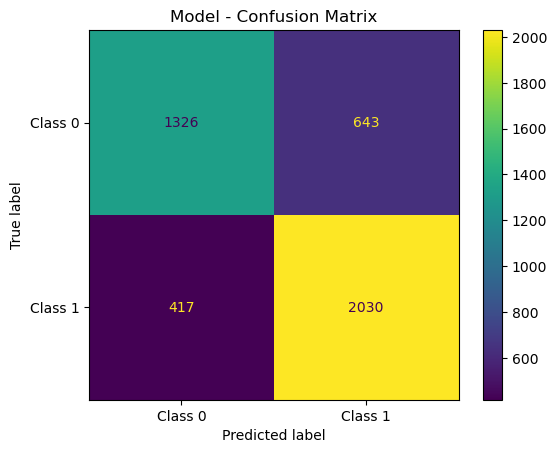

In [ ]:
gb = GradientBoostingClassifier(
    n_estimators=20, learning_rate=.1, max_features=2, max_depth=10, random_state=42)
gb.fit(x_train, y_train)
ypred = gb.predict(x_test)
mse = mean_squared_error(y_test, ypred)

print("Gradient Boosting Model Accuracy Score: {:4f}".format(accuracy_score(y_test, ypred)))
print("MSE: {0:.4f}".format(mse))
print_matrix(gb, x_test, y_test)
predictions['TSNE_GB'] = accuracy_score(y_test, ypred)


In [ ]:
from xgboost import XGBClassifier
for learning_rate in learning_rates:
    xgb_model = XGBClassifier(
        objective="binary:logistic", learning_rate=learning_rate, random_state=42)
    xgb_model.fit(x_train, y_train)

    y_pred = xgb_model.predict(x_test)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(
        xgb_model.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        xgb_model.score(x_test, y_test)))
    print()


Learning rate:  0.05
Accuracy score (training): 0.777
Accuracy score (validation): 0.743

Learning rate:  0.1
Accuracy score (training): 0.789
Accuracy score (validation): 0.745

Learning rate:  0.25
Accuracy score (training): 0.828
Accuracy score (validation): 0.755

Learning rate:  0.5
Accuracy score (training): 0.865
Accuracy score (validation): 0.760

Learning rate:  0.75
Accuracy score (training): 0.884
Accuracy score (validation): 0.752

Learning rate:  1
Accuracy score (training): 0.902
Accuracy score (validation): 0.750



XGB Model Accuracy Score: 0.754755
MSE: 0.3653


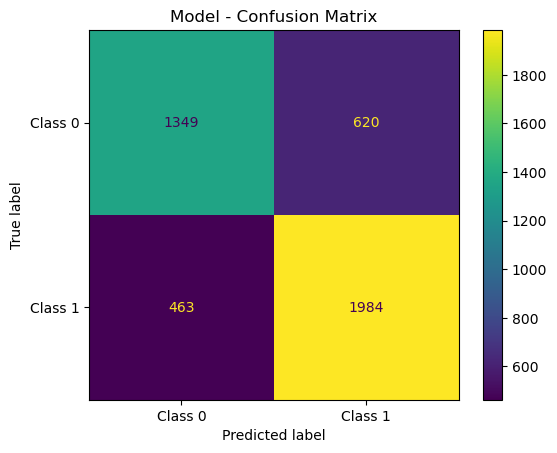

In [ ]:
xgb_model = XGBClassifier(
    objective="binary:logistic", learning_rate=.25, random_state=42)
xgb_model.fit(x_train, y_train)
ypred = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print("XGB Model Accuracy Score: {:4f}".format(
    accuracy_score(y_test, ypred)))
print("MSE: {0:.4f}".format(mse))
print_matrix(xgb_model, x_test, y_test)
predictions['TSNE_XGB'] = accuracy_score(y_test, ypred)


- KNN outpreformed both GB and XGB

#### <center> `SVC`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    kb_x, y, test_size=.2, random_state=42)


Test Score:  0.6517210144927537
KNN Model Accuracy Score:  0.6517210144927537


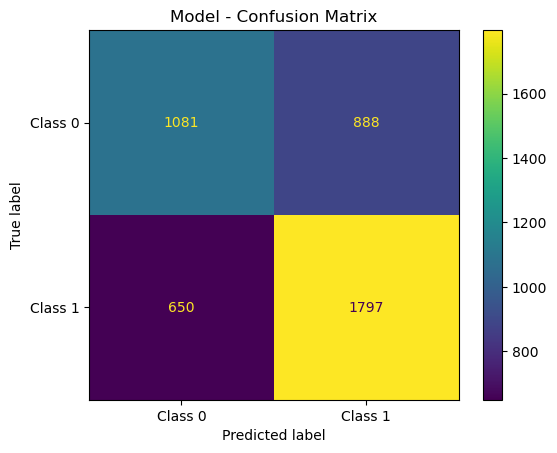

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print("Test Score: ", svc.score(x_test, y_test))
print("KNN Model Accuracy Score: ", accuracy_score(y_test, y_pred))

print_matrix(svc, x_test, y_test)
predictions['SVC'] = accuracy_score(y_test, y_pred)


### <center> `Decision Tree`

In [ ]:
tree = DecisionTreeClassifier(max_depth=10)
bag = BaggingClassifier(tree, n_estimators=100,
                        max_samples=0.8, random_state=1)
bag.fit(x_train, y_train)
ypred = bag.predict(x_test)
mse = mean_squared_error(y_test, pred)
print("MSE: {:3f}%".format(100*mse))
print("DT Model Accuracy Score: {:3f}%".format(100*accuracy_score(y_test, ypred)))
predictions['DT-BAG'] = accuracy_score(y_test, ypred)


MSE: 31.453804%
DT Model Accuracy Score: 67.413949%


In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators=20, learning_rate=learning_rate, max_depth=10, max_features='auto', random_state=42)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    gb_pred = gb.predict(x_test)
    mse = mean_squared_error(y_test, gb_pred)
    print("Accuracy score (training): {0:.3f}".format(
        gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        gb.score(x_test, y_test)))
    print()



Learning rate:  0.05
Accuracy score (training): 0.800
Accuracy score (validation): 0.663

Learning rate:  0.1
Accuracy score (training): 0.822
Accuracy score (validation): 0.672

Learning rate:  0.25
Accuracy score (training): 0.858
Accuracy score (validation): 0.670

Learning rate:  0.5
Accuracy score (training): 0.870
Accuracy score (validation): 0.651

Learning rate:  0.75
Accuracy score (training): 0.887
Accuracy score (validation): 0.651

Learning rate:  1
Accuracy score (training): 0.894
Accuracy score (validation): 0.640



- `no noticable improvement from Gradient boost DT, lets try XGBoost`

In [ ]:
from xgboost import XGBClassifier
for learning_rate in learning_rates:
    xgb_model = XGBClassifier(objective="binary:logistic", learning_rate=learning_rate, random_state=42)
    xgb_model.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    y_pred = xgb_model.predict(x_test)
    print("Accuracy score (training): {0:.3f}".format(
        xgb_model.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        xgb_model.score(x_test, y_test)))
    print()


Learning rate:  0.05
Accuracy score (training): 0.734
Accuracy score (validation): 0.681

Learning rate:  0.1
Accuracy score (training): 0.753
Accuracy score (validation): 0.680

Learning rate:  0.25
Accuracy score (training): 0.798
Accuracy score (validation): 0.671

Learning rate:  0.5
Accuracy score (training): 0.841
Accuracy score (validation): 0.664

Learning rate:  0.75
Accuracy score (training): 0.862
Accuracy score (validation): 0.657

Learning rate:  1
Accuracy score (training): 0.878
Accuracy score (validation): 0.635



XGB Model Accuracy Score: 0.683197
MSE: 0.3653


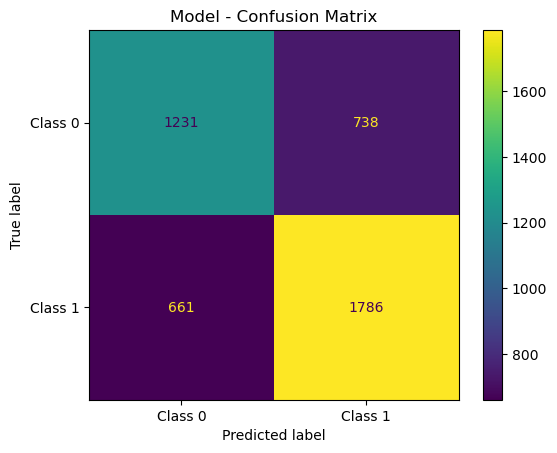

In [ ]:
xgb_model = XGBClassifier(
    objective="binary:logistic", learning_rate=.1, random_state=42)
xgb_model.fit(x_train, y_train)
ypred = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print("XGB Model Accuracy Score: {:4f}".format(
    accuracy_score(y_test, ypred)))
print("MSE: {0:.4f}".format(mse))
print_matrix(xgb_model, x_test, y_test)
predictions['DT_XGB'] = accuracy_score(ypred, y_test)


### <center> `Random Forest`

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    rf_df, y, test_size=.2, random_state=42)

rf = RandomForestClassifier(max_depth=10, random_state=42,
                                  n_estimators=300).fit(x_train, y_train)
pred = rf.predict(x_test)

print('accuracy_score: ', accuracy_score(pred, y_test))
print('score : ', rf.score(x_test, y_test))
predictions['RF'] = accuracy_score(pred, y_test)


accuracy_score:  0.6854619565217391
score :  0.6854619565217391


# Conclusion

* What did not work?

    `We tried multiple different classification models such as Logistic Regression, and Naive Bayes. For data processing we tried PCA  and Lasso Regression.`
* What do you think why? 

    `Logistic Regression: This model did not work for us when we used it because the size and type of data we had. We could not narrow down our attributes to only two columns that would accurately represent our data set.`
   
    `Naive Bayes: This model did not work for us becuase it is mainly used for bianary and multicollinearity classification which was not the format that our data was in.`
   
    `PCA: We tried this for of data processing but from the visualization we could tell that it did not format the data in a helpful manner. PCA is mainly used for a small amount of attributes that are highly correlated which our data set was not.`
   
    `Lasson Regression: This form of data processing did not work for us because our data lacked high multicollineraity and was not overfit.`

* What were approaches, tuning model parameters you have tried? 

    `We tuened the parameter on our data processing methods which are KNN and Gradient Boosting.`
* What features worked well and what didn't? 

    `KNN: Tuning the parameters of KNN allowed us to see cleary how a increasing k value can effect our data with scores being produced on each iteration. This worked well because it let us see what the best value of k is which helped us with our feature selections.`
    
    `Gradient Boosting: Tuning the parameters of Gradient Boosting allowed us to see how it effected our data with different learning rates and estimators. This did not really have an effect on our data, therefore it did not work well.  `
* When describing methods that didn't work, make clear how they failed and any evaluation metrics you used to decide so. 

    `Logistic Regression: This did not work for us becasue of the format of the data. We did not use a metric to determine if we should use it or not, it was simply the fact the no two columns could accuratle represent our data for our machine learning goal.`

    `Naive Bayes: This did not work for us because of the format of the data. We decided this based off of the fact that when scaled and applied to a correlation map we could see that none of the columns were super correlated to one another. This and the fact that our data was not binary lead us no not implement it.`

    `PCA: This did not work because of the format of the data. The metric we used to determine that it would not be implemented is the vizulation that was produced when we applied to our data.`

    `Lasso Regression: This did not work because of the format of the data. The metric that we used to determine not implementing it was when the data was applied to a correlation matrix we could see that no columns were highly correlated which is mainly used for this type of data processing.`
* How was that a data-driven decision? Be consise, all details can be left in .ipynb

    `These were data-driven decisions because we used scoring methods and model visualizations that led us to make the decesion not to implement them. `


### <center> Summary Accuracy
- What does our test accuracy look like for our various classifiers?

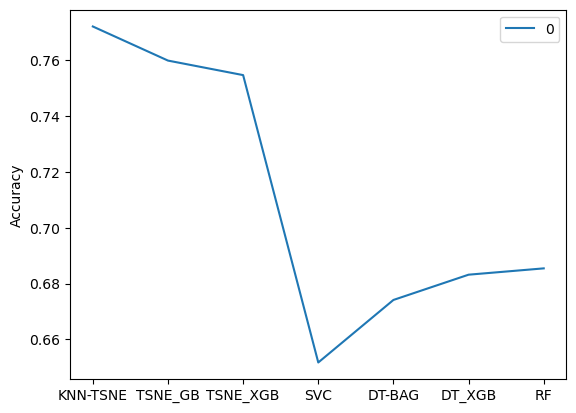

In [ ]:
acc = pd.DataFrame(predictions, index=[0])
acc = acc.transpose()
acc.plot.line()
plt.ylabel('Accuracy')
plt.show()